

 P[0][0] = 11.0 
 P[0][1] = 2.5333 
 P[0][2] = 2.758518508114001 


 P[1][0] = 2.5333 
 P[1][1] = 1.67731333 
 P[1][2] = 1.268965386310994 


 P[2][0] = 2.758518508114001 
 P[2][1] = 1.268965386310994 
 P[2][2] = 1.1481196751472893 
 39089.0 
 9316.0169 
 9990.883865226466 
Оценённые параметры:
θ0 = 3478.8373
θ1 = 244.2439
θ2 = 73.6070
S_min = 2547.2252
Дисперсия измерения: σ^2 = 318.4032


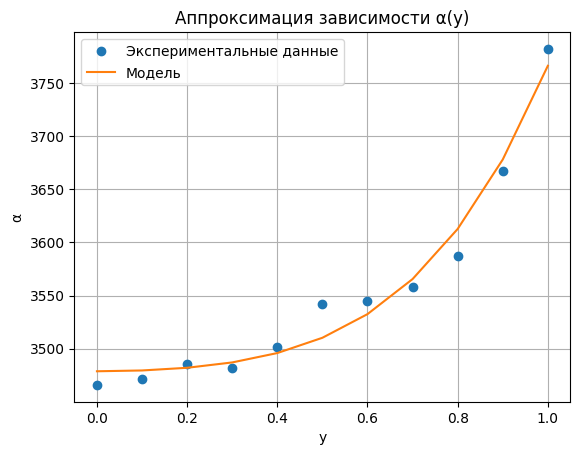


Таблица аппроксимации:

 i |      y_i |    α_i |    α̃(y_i) |       Δα_i |     (Δα_i)^2
------------------------------------------------------------
 0 |   0.0000 | 3466.0 |    3478.84 |     -12.84 |       164.80
 1 |   0.1000 | 3472.0 |    3479.59 |      -7.59 |        57.67
 2 |   0.2000 | 3486.0 |    3482.12 |       3.88 |        15.09
 3 |   0.3000 | 3482.0 |    3487.15 |      -5.15 |        26.55
 4 |   0.4000 | 3502.0 |    3495.97 |       6.03 |        36.39
 5 |   0.5000 | 3542.0 |    3510.34 |      31.66 |      1002.31
 6 |   0.6000 | 3545.0 |    3532.58 |      12.42 |       154.16
 7 |   0.7000 | 3558.0 |    3565.56 |      -7.56 |        57.14
 8 |   0.8000 | 3587.0 |    3612.70 |     -25.70 |       660.29
 9 |   0.9000 | 3667.0 |    3678.01 |     -11.01 |       121.29
10 |   1.0000 | 3782.0 |    3766.14 |      15.86 |       251.54
------------------------------------------------------------
                                  S_min =      2547.23


In [24]:
import numpy as np
from math import asin, pi
import matplotlib.pyplot as plt

# Исходные данные
U = np.array([41.0, 53.5, 66.0, 78.5, 91.0, 103.5, 116.0, 128.5, 141.0, 153.5, 166.0])
alpha = np.array([3466, 3472, 3486, 3482, 3502, 3542, 3545, 3558, 3587, 3667, 3782])

# Параметры
U0 = 41.0
Theta0 = 166.0
g = 0.7
n = len(U)

# Новая переменная y
y = (U - U0) / (Theta0 - U0)

# Функции phi1 = y^4 и phi2 = y^2 * cos^2(g*y)
phi0 = np.ones(n)
phi1 = y**4
phi2 = y**2 * np.cos(g * y)**2

# Матрица P
P = np.array([
    [np.sum(phi0 * phi0), np.sum(phi0 * phi1), np.sum(phi0 * phi2)],
    [np.sum(phi1 * phi0), np.sum(phi1 * phi1), np.sum(phi1 * phi2)],
    [np.sum(phi2 * phi0), np.sum(phi2 * phi1), np.sum(phi2 * phi2)]
])

for i in range(0, 3, 1) : 
    print(f"\n")
    for j in range(0, 3, 1) : 
        print(f" P[{i}][{j}] = {P[i][j]} ")


# Вектор V
V = np.array([
    np.sum(alpha * phi0),
    np.sum(alpha * phi1),
    np.sum(alpha * phi2)
])

for i in range(0, 3, 1) : 
        print(f" {V[i]} ")

# Решение системы уравнений
theta = np.linalg.solve(P, V)
theta0, theta1, theta2 = theta
# theta1 = 0

# Аппроксимированные значения
alpha_model = theta0 + theta1 * phi1 + theta2 * phi2

# Вычисление S_min
S_min = np.sum((alpha - alpha_model)**2)

# Дисперсия измерения
m = 3
sigma_sq = S_min / (n - m)

# Вывод результатов
print("Оценённые параметры:")
print(f"θ0 = {theta0:.4f}")
print(f"θ1 = {theta1:.4f}")
print(f"θ2 = {theta2:.4f}")
print(f"S_min = {S_min:.4f}")
print(f"Дисперсия измерения: σ^2 = {sigma_sq:.4f}")

# График
plt.plot(y, alpha, 'o', label='Экспериментальные данные')
plt.plot(y, alpha_model, '-', label='Модель')
plt.xlabel('y')
plt.ylabel('α')
plt.title('Аппроксимация зависимости α(y)')
plt.legend()
plt.grid(True)
plt.show()

# Вывод заголовка таблицы
print("\nТаблица аппроксимации:\n")
print(f"{'i':>2} | {'y_i':>8} | {'α_i':>6} | {'α̃(y_i)':>10} | {'Δα_i':>10} | {'(Δα_i)^2':>12}")
print("-" * 60)

# Вывод строк таблицы
for i in range(n):
    delta = alpha[i] - alpha_model[i]
    delta_sq = delta**2
    print(f"{i:2d} | {y[i]:8.4f} | {alpha[i]:6.1f} | {alpha_model[i]:10.2f} | {delta:10.2f} | {delta_sq:12.2f}")

# Вывод суммы квадратов отклонений внизу таблицы
print("-" * 60)
print(f"{'S_min':>39} = {S_min:12.2f}")



Таблица с доверительными интервалами:
     y_i |    α_i |    α̃(y_i) | σ̃[α̃(y_i)] |    b1(y_i) |    b2(y_i)
--------------------------------------------------------------------------------
  0.0000 | 3466.0 |    3478.84 |       9.67 |    3460.86 |    3496.82
  0.1000 | 3472.0 |    3479.59 |       9.25 |    3462.39 |    3496.80
  0.2000 | 3486.0 |    3482.12 |       8.15 |    3466.95 |    3497.28
  0.3000 | 3482.0 |    3487.15 |       6.92 |    3474.28 |    3500.03
  0.4000 | 3502.0 |    3495.97 |       6.48 |    3483.92 |    3508.02
  0.5000 | 3542.0 |    3510.34 |       7.29 |    3496.78 |    3523.90
  0.6000 | 3545.0 |    3532.58 |       8.56 |    3516.67 |    3548.50
  0.7000 | 3558.0 |    3565.56 |       9.20 |    3548.44 |    3582.68
  0.8000 | 3587.0 |    3612.70 |       8.80 |    3596.33 |    3629.06
  0.9000 | 3667.0 |    3678.01 |       9.23 |    3660.84 |    3695.18
  1.0000 | 3782.0 |    3766.14 |      15.68 |    3736.98 |    3795.30


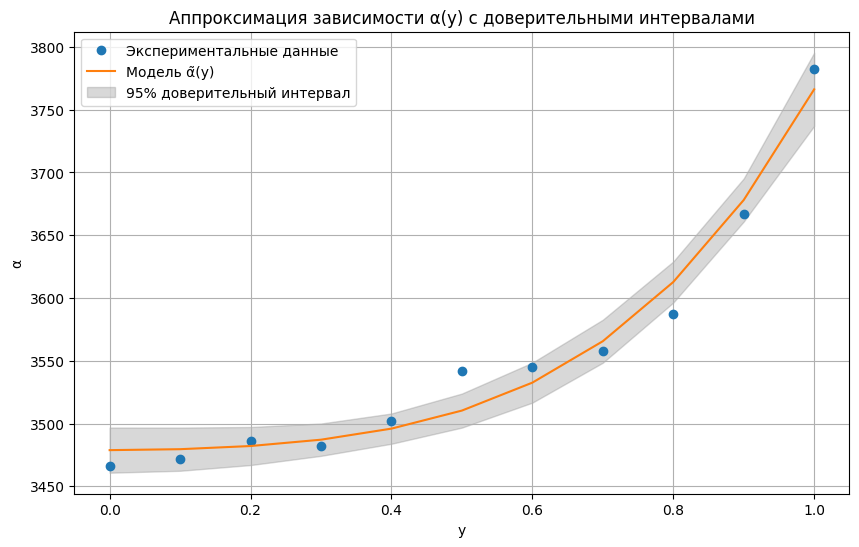


Корреляционная матрица K:
[[   93.5124684    175.45496815  -418.59935569]
 [  175.45496815  1487.94729312 -2066.1168343 ]
 [ -418.59935569 -2066.1168343   3566.65603658]]


In [25]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# ... (предыдущий код остается без изменений до вычисления sigma_sq)

# 5. Корреляционная матрица K = sigma^2 * P^{-1}
K = sigma_sq * np.linalg.inv(P)

# 6. Доверительные интервалы для параметров theta (n - m = 8, alpha = 0.05)
t_value = t.ppf(1 - 0.05, n - m)  # t-критерий Стьюдента для двустороннего интервала

# Стандартные отклонения параметров (диагональные элементы K)
sigma_theta0 = np.sqrt(K[0, 0])
sigma_theta1 = np.sqrt(K[1, 1])
sigma_theta2 = np.sqrt(K[2, 2])

# Доверительные интервалы
theta0_ci = (theta0 - t_value * sigma_theta0, theta0 + t_value * sigma_theta0)
theta1_ci = (theta1 - t_value * sigma_theta1, theta1 + t_value * sigma_theta1)
theta2_ci = (theta2 - t_value * sigma_theta2, theta2 + t_value * sigma_theta2)

# 7. Дисперсия функции регрессии sigma^2[alpha(y)]
def sigma2_alpha(y_val):
    phi1_val = y_val**4
    phi2_val = y_val**2 * np.cos(g * y_val)**2
    return (K[0, 0] + 2 * K[0, 1] * phi1_val + 2 * K[0, 2] * phi2_val +
            K[1, 1] * phi1_val**2 + 2 * K[1, 2] * phi1_val * phi2_val +
            K[2, 2] * phi2_val**2)

# 8. Доверительный интервал для функции alpha(y)
def alpha_ci(y_val, alpha_pred):
    sigma_alpha = np.sqrt(sigma2_alpha(y_val))
    return (alpha_pred - t_value * sigma_alpha, alpha_pred + t_value * sigma_alpha)

# Вычисление доверительных интервалов для всех y_i
alpha_ci_lower = []
alpha_ci_upper = []
for yi, ai_pred in zip(y, alpha_model):
    ci = alpha_ci(yi, ai_pred)
    alpha_ci_lower.append(ci[0])
    alpha_ci_upper.append(ci[1])

# 9. Таблица результатов
print("\nТаблица с доверительными интервалами:")
print(f"{'y_i':>8} | {'α_i':>6} | {'α̃(y_i)':>10} | {'σ̃[α̃(y_i)]':>10} | {'b1(y_i)':>10} | {'b2(y_i)':>10}")
print("-" * 80)
for i in range(n):
    sigma_alpha_i = np.sqrt(sigma2_alpha(y[i]))
    b1 = alpha_model[i] - t_value * sigma_alpha_i
    b2 = alpha_model[i] + t_value * sigma_alpha_i
    print(f"{y[i]:8.4f} | {alpha[i]:6.1f} | {alpha_model[i]:10.2f} | {sigma_alpha_i:10.2f} | {b1:10.2f} | {b2:10.2f}")

# График с доверительными интервалами
plt.figure(figsize=(10, 6))
plt.plot(y, alpha, 'o', label='Экспериментальные данные')
plt.plot(y, alpha_model, '-', label='Модель α̃(y)')
plt.fill_between(y, alpha_ci_lower, alpha_ci_upper, color='gray', alpha=0.3, label='95% доверительный интервал')
plt.xlabel('y')
plt.ylabel('α')
plt.title('Аппроксимация зависимости α(y) с доверительными интервалами')
plt.legend()
plt.grid(True)
plt.show()

# Вывод корреляционной матрицы
print("\nКорреляционная матрица K:")
print(K)


=== Пункт 5: Корреляционная матрица ===
Корреляционная матрица K:
K = σ² * P⁻¹ =
[[   93.5124684    175.45496815  -418.59935569]
 [  175.45496815  1487.94729312 -2066.1168343 ]
 [ -418.59935569 -2066.1168343   3566.65603658]]

Элементы матрицы K:
K[0,0] (σ²_θ0): 93.5125
K[1,1] (σ²_θ1): 1487.9473
K[2,2] (σ²_θ2): 3566.6560
K[0,1] (cov(θ0,θ1)): 175.4550
K[0,2] (cov(θ0,θ2)): -418.5994
K[1,2] (cov(θ1,θ2)): -2066.1168

=== Пункт 6: Доверительные интервалы для параметров ===
t-значение (n-m=8, α=0.05): 1.8595

Стандартные отклонения параметров:
σ(θ0) = √K[0,0] = 9.6702
σ(θ1) = √K[1,1] = 38.5739
σ(θ2) = √K[2,2] = 59.7215

Доверительные интервалы параметров:
θ0: [3460.8552, 3496.8195]
θ1: [172.5139, 315.9740]
θ2: [-37.4480, 184.6619]

=== Пункт 7: Дисперсия функции регрессии ===

Для y = 0.0:
φ1(y) = y⁴ = 0.0000
φ2(y) = y²cos²(gy) = 0.0000
σ²[α̃(y)] = K[0,0] + 2*K[0,1]*φ1(y) + 2*K[0,2]*φ2(y) + K[1,1]*φ1²(y) + 2*K[1,2]*φ1(y)φ2(y) + K[2,2]*φ2²(y)
         = 93.5125 + 2*175.4550*0.0000 + 2*-418.5

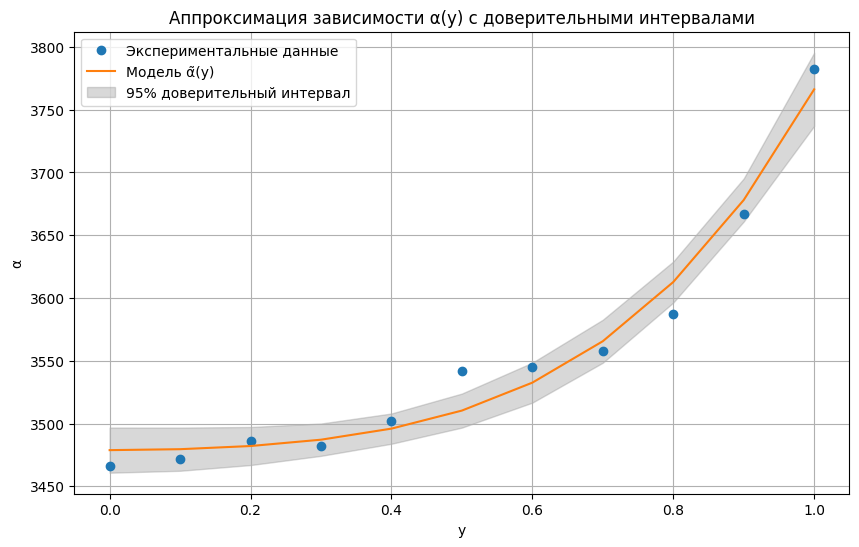

In [26]:
print("\n=== Пункт 5: Корреляционная матрица ===")
# 5. Корреляционная матрица K = sigma^2 * P^{-1}
K = sigma_sq * np.linalg.inv(P)
print("Корреляционная матрица K:")
print("K = σ² * P⁻¹ =")
print(K)
print("\nЭлементы матрицы K:")
print(f"K[0,0] (σ²_θ0): {K[0,0]:.4f}")
print(f"K[1,1] (σ²_θ1): {K[1,1]:.4f}")
print(f"K[2,2] (σ²_θ2): {K[2,2]:.4f}")
print(f"K[0,1] (cov(θ0,θ1)): {K[0,1]:.4f}")
print(f"K[0,2] (cov(θ0,θ2)): {K[0,2]:.4f}")
print(f"K[1,2] (cov(θ1,θ2)): {K[1,2]:.4f}")

print("\n=== Пункт 6: Доверительные интервалы для параметров ===")
# 6. Доверительные интервалы для параметров theta (n - m = 8, alpha = 0.05)
t_value = t.ppf(1 - 0.05, n - m)  # t-критерий Стьюдента для двустороннего интервала
print(f"t-значение (n-m=8, α=0.05): {t_value:.4f}")

# Стандартные отклонения параметров (диагональные элементы K)
sigma_theta0 = np.sqrt(K[0, 0])
sigma_theta1 = np.sqrt(K[1, 1])
sigma_theta2 = np.sqrt(K[2, 2])

print("\nСтандартные отклонения параметров:")
print(f"σ(θ0) = √K[0,0] = {sigma_theta0:.4f}")
print(f"σ(θ1) = √K[1,1] = {sigma_theta1:.4f}")
print(f"σ(θ2) = √K[2,2] = {sigma_theta2:.4f}")

# Доверительные интервалы
theta0_ci = (theta0 - t_value * sigma_theta0, theta0 + t_value * sigma_theta0)
theta1_ci = (theta1 - t_value * sigma_theta1, theta1 + t_value * sigma_theta1)
theta2_ci = (theta2 - t_value * sigma_theta2, theta2 + t_value * sigma_theta2)

print("\nДоверительные интервалы параметров:")
print(f"θ0: [{theta0_ci[0]:.4f}, {theta0_ci[1]:.4f}]")
print(f"θ1: [{theta1_ci[0]:.4f}, {theta1_ci[1]:.4f}]")
print(f"θ2: [{theta2_ci[0]:.4f}, {theta2_ci[1]:.4f}]")

print("\n=== Пункт 7: Дисперсия функции регрессии ===")
# 7. Дисперсия функции регрессии sigma^2[alpha(y)]
def sigma2_alpha(y_val):
    phi1_val = y_val**4
    phi2_val = y_val**2 * np.cos(g * y_val)**2
    variance = (K[0, 0] + 2 * K[0, 1] * phi1_val + 2 * K[0, 2] * phi2_val +
               K[1, 1] * phi1_val**2 + 2 * K[1, 2] * phi1_val * phi2_val +
               K[2, 2] * phi2_val**2)
    print(f"\nДля y = {y_val:.1f}:")
    print(f"φ1(y) = y⁴ = {phi1_val:.4f}")
    print(f"φ2(y) = y²cos²(gy) = {phi2_val:.4f}")
    print("σ²[α̃(y)] = K[0,0] + 2*K[0,1]*φ1(y) + 2*K[0,2]*φ2(y) + K[1,1]*φ1²(y) + 2*K[1,2]*φ1(y)φ2(y) + K[2,2]*φ2²(y)")
    print(f"         = {K[0,0]:.4f} + 2*{K[0,1]:.4f}*{phi1_val:.4f} + 2*{K[0,2]:.4f}*{phi2_val:.4f} + "
          f"{K[1,1]:.4f}*{phi1_val**2:.4f} + 2*{K[1,2]:.4f}*{phi1_val:.4f}*{phi2_val:.4f} + {K[2,2]:.4f}*{phi2_val**2:.4f}")
    print(f"         = {variance:.4f}")
    return variance

# Вычисление для всех y_i
sigma2_alpha_values = [sigma2_alpha(yi) for yi in y]

print("\n=== Пункт 8: Доверительный интервал для функции ===")
# 8. Доверительный интервал для функции alpha(y)
def alpha_ci(y_val, alpha_pred):
    sigma_alpha = np.sqrt(sigma2_alpha(y_val))
    ci_lower = alpha_pred - t_value * sigma_alpha
    ci_upper = alpha_pred + t_value * sigma_alpha
    print(f"Для y = {y_val:.1f}, α̃(y) = {alpha_pred:.2f}:")
    print(f"ДИ = α̃(y) ± t*σ[α̃(y)] = {alpha_pred:.2f} ± {t_value:.4f}*{sigma_alpha:.4f}")
    print(f"    = [{ci_lower:.2f}, {ci_upper:.2f}]")
    return (ci_lower, ci_upper)

# Вычисление доверительных интервалов для всех y_i
alpha_ci_lower = []
alpha_ci_upper = []
for yi, ai_pred in zip(y, alpha_model):
    ci = alpha_ci(yi, ai_pred)
    alpha_ci_lower.append(ci[0])
    alpha_ci_upper.append(ci[1])

print("\n=== Пункт 9: Таблица результатов ===")
# 9. Таблица результатов
print("\nТаблица с доверительными интервалами:")
print(f"{'y_i':>8} | {'α_i':>6} | {'α̃(y_i)':>10} | {'σ̃[α̃(y_i)]':>10} | {'b1(y_i)':>10} | {'b2(y_i)':>10}")
print("-" * 80)
for i in range(n):
    sigma_alpha_i = np.sqrt(sigma2_alpha_values[i])
    b1 = alpha_model[i] - t_value * sigma_alpha_i
    b2 = alpha_model[i] + t_value * sigma_alpha_i
    print(f"{y[i]:8.4f} | {alpha[i]:6.1f} | {alpha_model[i]:10.2f} | {sigma_alpha_i ** 2 :10.2f} | {b1:10.2f} | {b2:10.2f}")

# График с доверительными интервалами
plt.figure(figsize=(10, 6))
plt.plot(y, alpha, 'o', label='Экспериментальные данные')
plt.plot(y, alpha_model, '-', label='Модель α̃(y)')
plt.fill_between(y, alpha_ci_lower, alpha_ci_upper, color='gray', alpha=0.3, label='95% доверительный интервал')
plt.xlabel('y')
plt.ylabel('α')
plt.title('Аппроксимация зависимости α(y) с доверительными интервалами')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Упрощённая модель (только θ0, без φ1 и φ2)
theta0_simple = np.mean(alpha)  # Оценка θ0 — среднее значение α
alpha_simple = np.full_like(alpha, theta0_simple)  # Постоянная функция
S_min_simple = np.sum((alpha - alpha_simple)**2)

print(S_min_simple)


93064


In [30]:
# Число параметров
m_full = 3   # θ0, θ1, θ2
m_reduced = 1  # только θ0

# Статистика F
F_obs = ((S_min_simple - S_min) / (m_reduced)) / (S_min / (n - m_full))

print(F_obs)

120.50481236115282


In [29]:
from scipy.stats import f

alpha_level = 0.05
df1 = 1
df2 = n - m_full
F_crit = f.ppf(1 - alpha_level, df1, df2)

# Сравнение
print(f"F наблюдаемое: {F_obs:.4f}")
print(f"F критическое (уровень значимости 0.05): {F_crit:.4f}")

if F_obs >= F_crit:
    print("Гипотеза H₀ отвергается. Модель значимо лучше постоянной.")
else:
    print("Нет оснований отвергнуть H₀. Модель не значимо лучше постоянной.")


F наблюдаемое: 142.1418
F критическое (уровень значимости 0.05): 5.3177
Гипотеза H₀ отвергается. Модель значимо лучше постоянной.


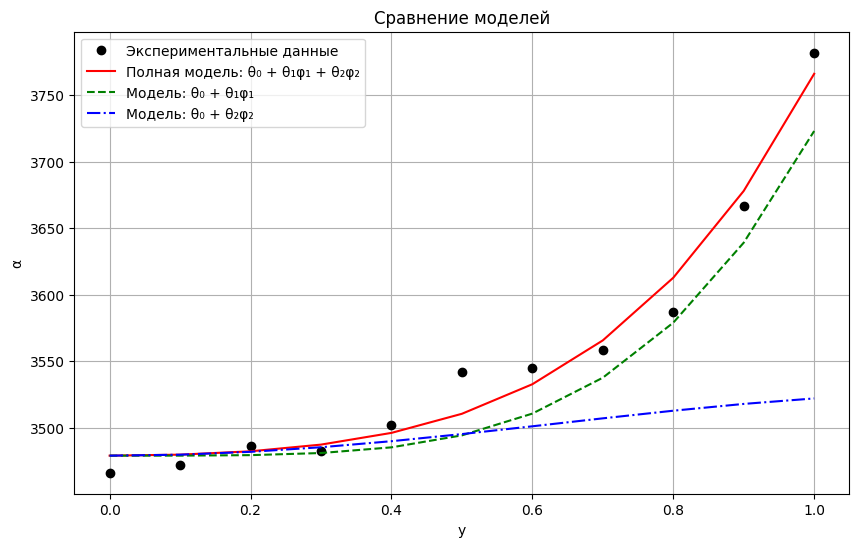

In [20]:
# Только φ1 модель: θ0 + θ1*φ1
alpha_phi1 = theta0 + theta1 * phi1

# Только φ2 модель: θ0 + θ2*φ2
alpha_phi2 = theta0 + theta2 * phi2

# График
plt.figure(figsize=(10, 6))
plt.plot(y, alpha, 'ko', label='Экспериментальные данные')
plt.plot(y, alpha_model, 'r-', label='Полная модель: θ₀ + θ₁φ₁ + θ₂φ₂')
plt.plot(y, alpha_phi1, 'g--', label='Модель: θ₀ + θ₁φ₁')
plt.plot(y, alpha_phi2, 'b-.', label='Модель: θ₀ + θ₂φ₂')
plt.xlabel('y')
plt.ylabel('α')
plt.title('Сравнение моделей')
plt.legend()
plt.grid(True)
plt.show()


=== Step 1: Transformed y values ===
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

=== Step 2: Basis Functions ===
phi_1(y) = [0.000e+00 1.000e-04 1.600e-03 8.100e-03 2.560e-02 6.250e-02 1.296e-01
 2.401e-01 4.096e-01 6.561e-01 1.000e+00]
phi_2(y) = [0.         0.00490802 0.01972941 0.04476396 0.0805391  0.12785709
 0.18787485 0.26223592 0.35329448 0.46451478 0.60124128]

=== Step 3: Normal Equations ===
P matrix:
 [[11.          2.5333      2.14695889]
 [ 2.5333      1.67731333  1.14847778]
 [ 2.14695889  1.14847778  0.83139781]]
V vector: [39089.          9316.0169      7820.19246621]

=== Step 4: Estimated Parameters ===
theta_0, theta_1, theta_2 = [3478.72481495  195.85837328  152.24279365]

=== Step 5: Predicted alpha values ===
[3478.72481495 3479.49161212 3482.04184869 3487.12625864 3496.00028634
 3510.43128448 3532.71065146 3565.67393868 3612.73494314 3677.94652149
 3766.11784001]

=== Step 6: S_min ===
2536.845080137409

=== Step 7: Variance ===
sigma^2 = 317.1056350171761

=

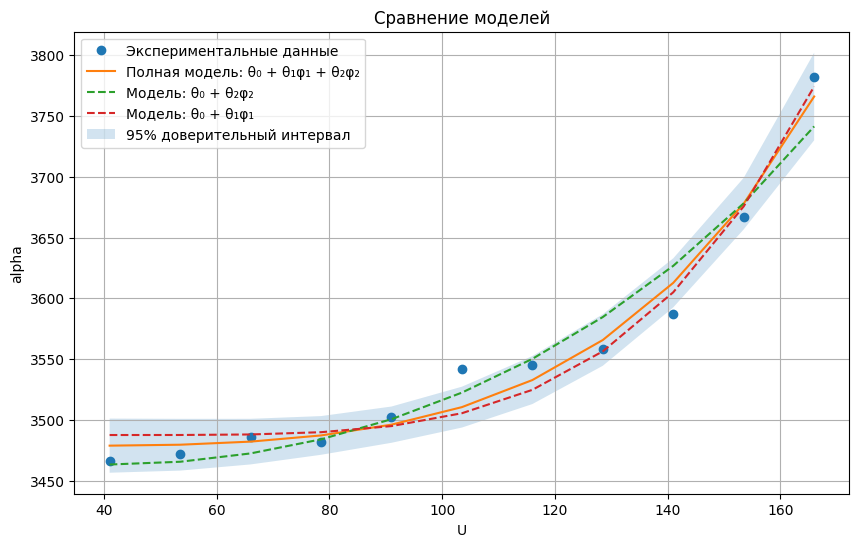

In [33]:
import numpy as np
from scipy.stats import t, f
import pandas as pd

# Step 1: Define the given data
U = np.array([41.0, 53.5, 66.0, 78.5, 91.0, 103.5, 116.0, 128.5, 141.0, 153.5, 166.0])
alpha_obs = np.array([3466, 3472, 3486, 3482, 3502, 3542, 3545, 3558, 3587, 3667, 3782])
U_0 = 41.0
Theta_0 = 166.0
g = 0.7
n = len(U)  # 11
m = 3       # number of parameters
df = n - m  # degrees of freedom = 8
alpha = 0.05  # significance level

# Step 2: Transform variable y
y = (U - U_0) / (Theta_0 - U_0)

# Step 3: Compute basis functions
phi_0 = np.ones_like(y)  # constant term, phi_0(y) = 1
phi_1 = y**4  # phi_1(y) = y^4
phi_2 = np.arcsin(g * y)**2  # phi_2(y) = arcsin^2(g*y)

# Step 4: Construct design matrix X for the full model
X = np.vstack((phi_0, phi_1, phi_2)).T

# Step 5: Solve for parameters using least squares (theta = (X^T X)^(-1) X^T alpha)
P = X.T @ X  # P matrix
V = X.T @ alpha_obs  # V vector
theta = np.linalg.solve(P, V)  # theta = [theta_0, theta_1, theta_2]

# Step 6: Compute predicted values alpha(y) = theta_0 + theta_1 phi_1(y) + theta_2 phi_2(y)
alpha_pred = X @ theta

# Step 7: Compute residuals and S_min
residuals = alpha_obs - alpha_pred
S_min = np.sum(residuals**2)

# Step 8: Compute variance of residuals
sigma_sq = S_min / df

# Step 9: Compute covariance matrix for theta
cov_matrix = sigma_sq * np.linalg.inv(P)

# Step 10: Standard errors for theta
theta_se = np.sqrt(np.diag(cov_matrix))

# Step 11: t-critical value for 95% confidence (df=8)
t_crit = t.ppf(1 - alpha/2, df)  # t_(n-m, 1-alpha/2)

# Step 12: Confidence intervals for theta
theta_ci_lower = theta - t_crit * theta_se
theta_ci_upper = theta + t_crit * theta_se

# Step 13: Variance of alpha(y)
def var_alpha_y(y_val):
    phi = np.array([1, y_val**4, np.arcsin(g * y_val)**2])
    var = phi @ cov_matrix @ phi
    return var

var_alpha = np.array([var_alpha_y(y_i) for y_i in y])
std_alpha = np.sqrt(var_alpha)

# Step 14: Confidence intervals for alpha(y)
alpha_ci_lower = alpha_pred - t_crit * std_alpha  # b1(y)
alpha_ci_upper = alpha_pred + t_crit * std_alpha  # b2(y)

# Step 15: Hypothesis testing (reduced models)
# Reduced model 1: alpha(y) = theta_0 + theta_2 phi_2(y) (theta_1 = 0)
X1 = np.vstack((phi_0, phi_2)).T
theta1 = np.linalg.solve(X1.T @ X1, X1.T @ alpha_obs)
alpha_pred1 = X1 @ theta1
S_min1 = np.sum((alpha_obs - alpha_pred1)**2)

# Reduced model 2: alpha(y) = theta_0 + theta_1 phi_1(y) (theta_2 = 0)
X2 = np.vstack((phi_0, phi_1)).T
theta2 = np.linalg.solve(X2.T @ X2, X2.T @ alpha_obs)
alpha_pred2 = X2 @ theta2
S_min2 = np.sum((alpha_obs - alpha_pred2)**2)

# Step 16: F-statistics
F1 = ((S_min1 - S_min) / (m - (m-1))) / (S_min / df)
F2 = ((S_min2 - S_min) / (m - (m-1))) / (S_min / df)

# Critical F-value (df1=1, df2=8, alpha=0.05)
F_crit = f.ppf(1 - alpha, 1, df)

# Step 17: Create the results table
results = pd.DataFrame({
    'y_i': y,
    'alpha_i': alpha_obs,
    'alpha_pred': alpha_pred,
    'var_alpha': var_alpha,
    'b1(y_i)': alpha_ci_lower,
    'b2(y_i)': alpha_ci_upper
})

# Step 18: Print all results
print("=== Step 1: Transformed y values ===")
print(y)

print("\n=== Step 2: Basis Functions ===")
print("phi_1(y) =", phi_1)
print("phi_2(y) =", phi_2)

print("\n=== Step 3: Normal Equations ===")
print("P matrix:\n", P)
print("V vector:", V)

print("\n=== Step 4: Estimated Parameters ===")
print("theta_0, theta_1, theta_2 =", theta)

print("\n=== Step 5: Predicted alpha values ===")
print(alpha_pred)

print("\n=== Step 6: S_min ===")
print(S_min)

print("\n=== Step 7: Variance ===")
print("sigma^2 =", sigma_sq)

print("\n=== Step 8: Covariance Matrix ===")
print(cov_matrix)

print("\n=== Step 9: Confidence Intervals for Parameters ===")
print("t-critical (df=8, 95%) =", t_crit)
print("CI for theta (lower):", theta_ci_lower)
print("CI for theta (upper):", theta_ci_upper)

print("\n=== Step 10: Variance and CI for alpha(y) ===")
print("Variance of alpha(y):", var_alpha)
print("Standard deviation of alpha(y):", std_alpha)
print("CI lower for alpha(y):", alpha_ci_lower)
print("CI upper for alpha(y):", alpha_ci_upper)

print("\n=== Step 11: Hypothesis Testing ===")
print("S_min1 (theta_1=0):", S_min1)
print("S_min2 (theta_2=0):", S_min2)
print("F1 (theta_1=0):", F1)
print("F2 (theta_2=0):", F2)
print("F-critical (df1=1, df2=8, alpha=0.05):", F_crit)
print("Decision for theta_1=0:", "Reject H_0" if F1 >= F_crit else "Fail to reject H_0")
print("Decision for theta_2=0:", "Reject H_0" if F2 >= F_crit else "Fail to reject H_0")

print("\n=== Step 12: Results Table ===")
print(results)

# Step 19: Compute the reduced models for plotting
# Full model: alpha(y) = theta_0 + theta_1 phi_1(y) + theta_2 phi_2(y)
alpha_full = alpha_pred
# Reduced model 1: alpha(y) = theta_0 + theta_2 phi_2(y)
alpha_red1 = alpha_pred1
# Reduced model 2: alpha(y) = theta_0 + theta_1 phi_1(y)
alpha_red2 = alpha_pred2

print("\n=== Step 13: Values for Plotting ===")
print("U values:", U)
print("Observed alpha:", alpha_obs)
print("Full model alpha:", alpha_full)
print("Reduced model 1 (theta_1=0):", alpha_red1)
print("Reduced model 2 (theta_2=0):", alpha_red2)

# Step 20: Optional - Plotting (uncomment to visualize)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(U, alpha_obs, 'o', label='Экспериментальные данные')
plt.plot(U, alpha_full, '-', label='Полная модель: θ₀ + θ₁φ₁ + θ₂φ₂')
plt.plot(U, alpha_red1, '--', label='Модель: θ₀ + θ₂φ₂')
plt.plot(U, alpha_red2, '--', label='Модель: θ₀ + θ₁φ₁')
plt.fill_between(U, alpha_ci_lower, alpha_ci_upper, alpha=0.2, label='95% доверительный интервал')
plt.xlabel('U')
plt.ylabel('alpha')
plt.title('Сравнение моделей')
plt.legend()
plt.grid(True)
plt.show()